Numerical columns for outlier detection: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

Column: radius_mean
Lower bound: -2.65, Upper bound: 2.65
Number of outliers: 52
Outlier values:
31     -2.715095
51      2.680599
58      2.943648
187    -2.731540
268    -2.904986
331     2.763914
354    -3.076384
429    -3.045871
692    -3.110002
709    -2.722669
727    -2.934700
851    -3.195942
974    -2.781171
1021   -3.464809
1055    3.181083
1095   -3.030890
1192   -2.675741
1221   -2.722050
1264    2

C:\Users\iamse\AppData\Local\Temp\ipykernel_10808\2691243144.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y='radius_mean', palette='pastel')
C:\Users\iamse\AppData\Local\Temp\ipykernel_10808\2691243144.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, y='radius_mean', palette='pastel')


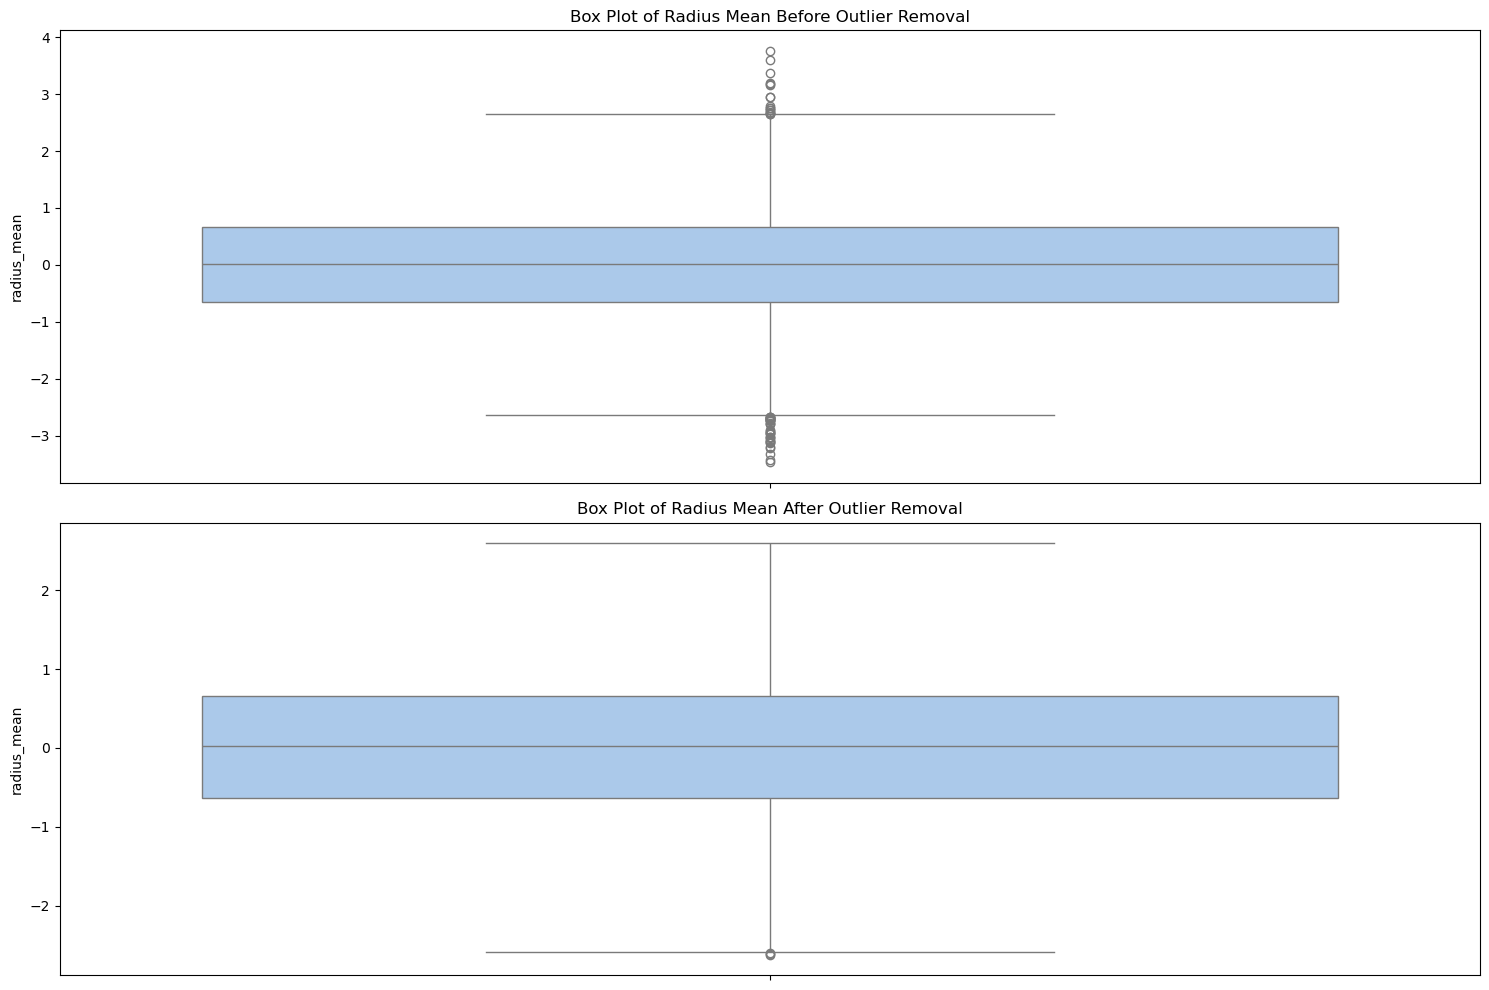

C:\Users\iamse\AppData\Local\Temp\ipykernel_10808\2691243144.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, y=col, palette='pastel')
C:\Users\iamse\AppData\Local\Temp\ipykernel_10808\2691243144.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, y=col, palette='pastel')
C:\Users\iamse\AppData\Local\Temp\ipykernel_10808\2691243144.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, y=col, palette='pastel')
C:\Users\iamse\AppData\Local\Temp\ipykernel_10808\2691243144.py:73: Futur

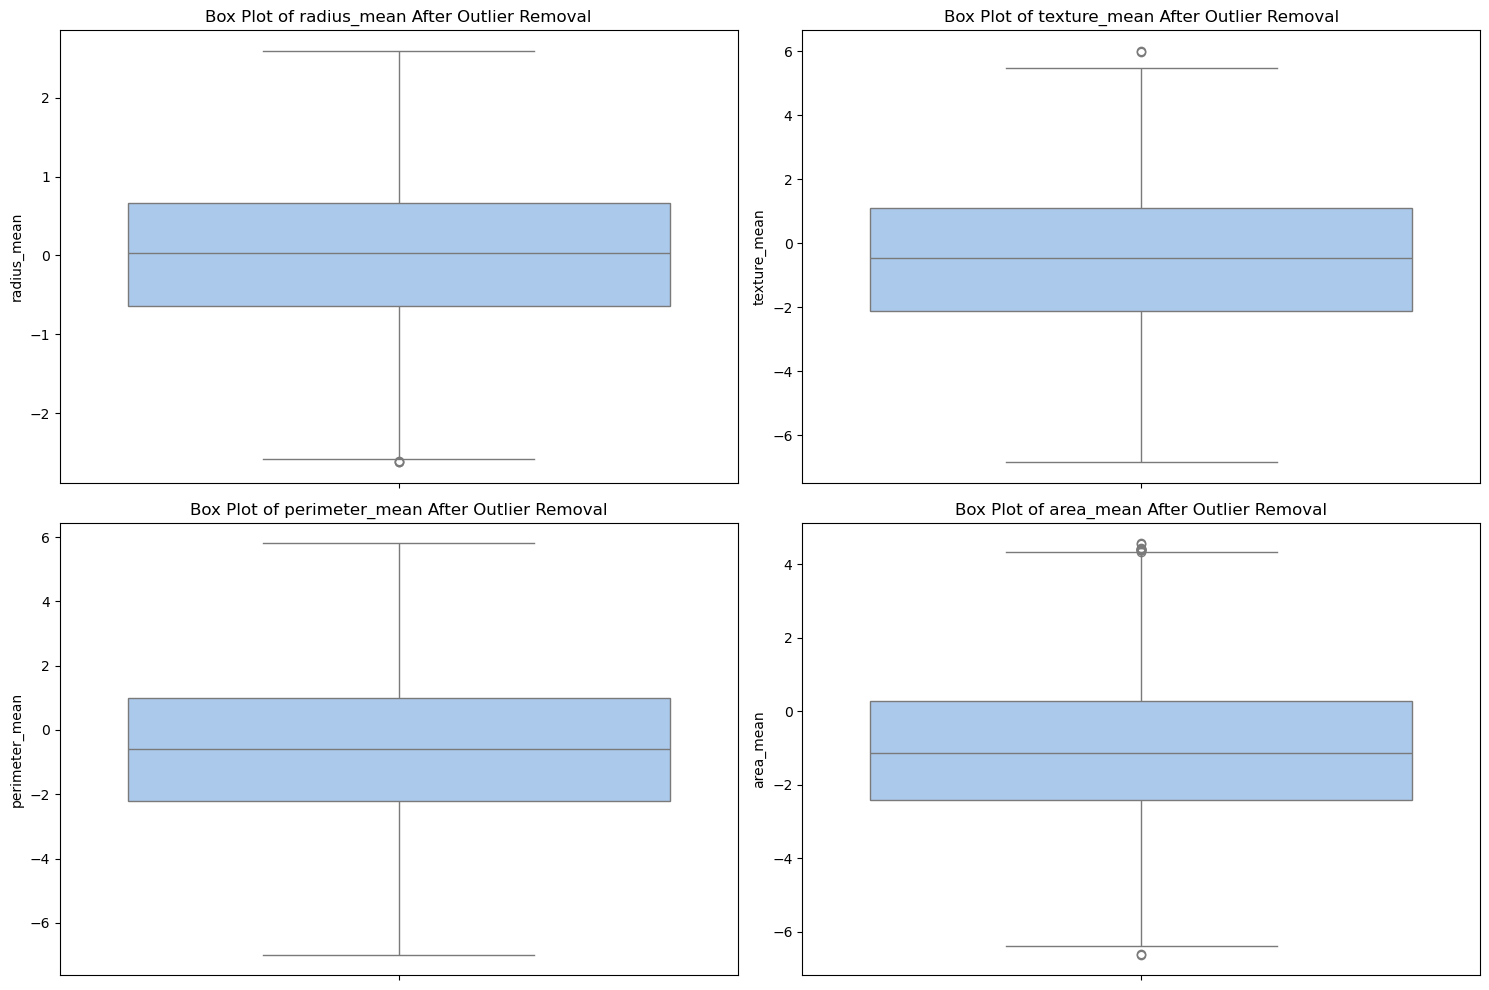

Cleaned dataset saved as 'cleaned_dataset_no_outliers.csv'


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace with your file path)
data = pd.read_csv('breast_cancer_updated.csv')

# Drop non-numeric or identifier columns (e.g., 'id', 'diagnosis')
if 'id' in data.columns:
    data = data.drop(columns=['id'])
if 'diagnosis' in data.columns:
    data_numeric = data.drop(columns=['diagnosis'])
else:
    data_numeric = data

# Select numerical columns for outlier detection
numerical_cols = data_numeric.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns for outlier detection: {numerical_cols}")

# Function to detect and remove outliers using IQR method
def remove_outliers_iqr(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"\nColumn: {column}")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outlier values:\n{outliers}")
    
    # Remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned, outliers

# Initialize the cleaned dataset
data_cleaned = data.copy()

# Apply outlier removal to each numerical column
for col in numerical_cols:
    data_cleaned, outliers = remove_outliers_iqr(data_cleaned, col, multiplier=1.5)

# Display the number of rows removed
rows_removed = len(data) - len(data_cleaned)
print(f"\nTotal rows before: {len(data)}")
print(f"Total rows after removing outliers: {len(data_cleaned)}")
print(f"Number of rows removed: {rows_removed}")

# --- Visualization: Box Plots Before and After ---
plt.figure(figsize=(15, 10))

# Before removal (using a key feature, e.g., 'radius_mean')
plt.subplot(2, 1, 1)
sns.boxplot(data=data, y='radius_mean', palette='pastel')
plt.title('Box Plot of Radius Mean Before Outlier Removal')

# After removal
plt.subplot(2, 1, 2)
sns.boxplot(data=data_cleaned, y='radius_mean', palette='pastel')
plt.title('Box Plot of Radius Mean After Outlier Removal')

plt.tight_layout()
plt.show()

# Optional: Visualize multiple features after removal
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:4], 1):  # Limit to first 4 columns for clarity
    plt.subplot(2, 2, i)
    sns.boxplot(data=data_cleaned, y=col, palette='pastel')
    plt.title(f'Box Plot of {col} After Outlier Removal')
plt.tight_layout()
plt.show()

# Save the cleaned dataset
data_cleaned.to_csv('cleaned_dataset_no_outliers.csv', index=False)
print("Cleaned dataset saved as 'cleaned_dataset_no_outliers.csv'")